In [1]:
import matplotlib.pyplot as plt
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.utils import plot_model

from keras.layers import Concatenate
import cv2
from keras.datasets import mnist
from glob import glob
import os
import pandas as pd
import numpy as np

import pickle

from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [2]:
def load_data(p):
  patern = os.path.join(p,'*.png')
  files = glob(patern)
  X=[]
  Y = []
  for i in files:
    char = list(os.path.splitext(os.path.basename(i))[0])
    if len(char)!=4:
      continue
    img = cv2.imread(i)
    img  = (255-img[:,:,2])/255
    X.append(img)
    Y.append(char)
  X = np.array(X)
  Y = np.array(Y)
  return X,Y

In [3]:
x,y = load_data('../../part4_Machine Learning/Noron/2_1_Convolutional/train/')

In [4]:
x_test,y_test = load_data('../../part4_Machine Learning/Noron/2_1_Convolutional/test/')

In [5]:
x.shape

(9843, 24, 72)

In [6]:
encoder = LabelEncoder()
encoder.fit(y.reshape(-1))
with open('encoder.bin','wb')as f:
  pickle.dump(encoder,f)

In [7]:
encoder.classes_

array(['2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T',
       'U', 'V', 'W', 'X', 'Y', 'Z'], dtype='<U1')

In [8]:
y_encoded = encoder.transform(y.reshape(-1)).reshape(-1,4)
y_test_encoded = encoder.transform(y_test.reshape(-1)).reshape(-1,4)

In [9]:
y_t = to_categorical(y_encoded)
y_test_t = to_categorical(y_test_encoded)

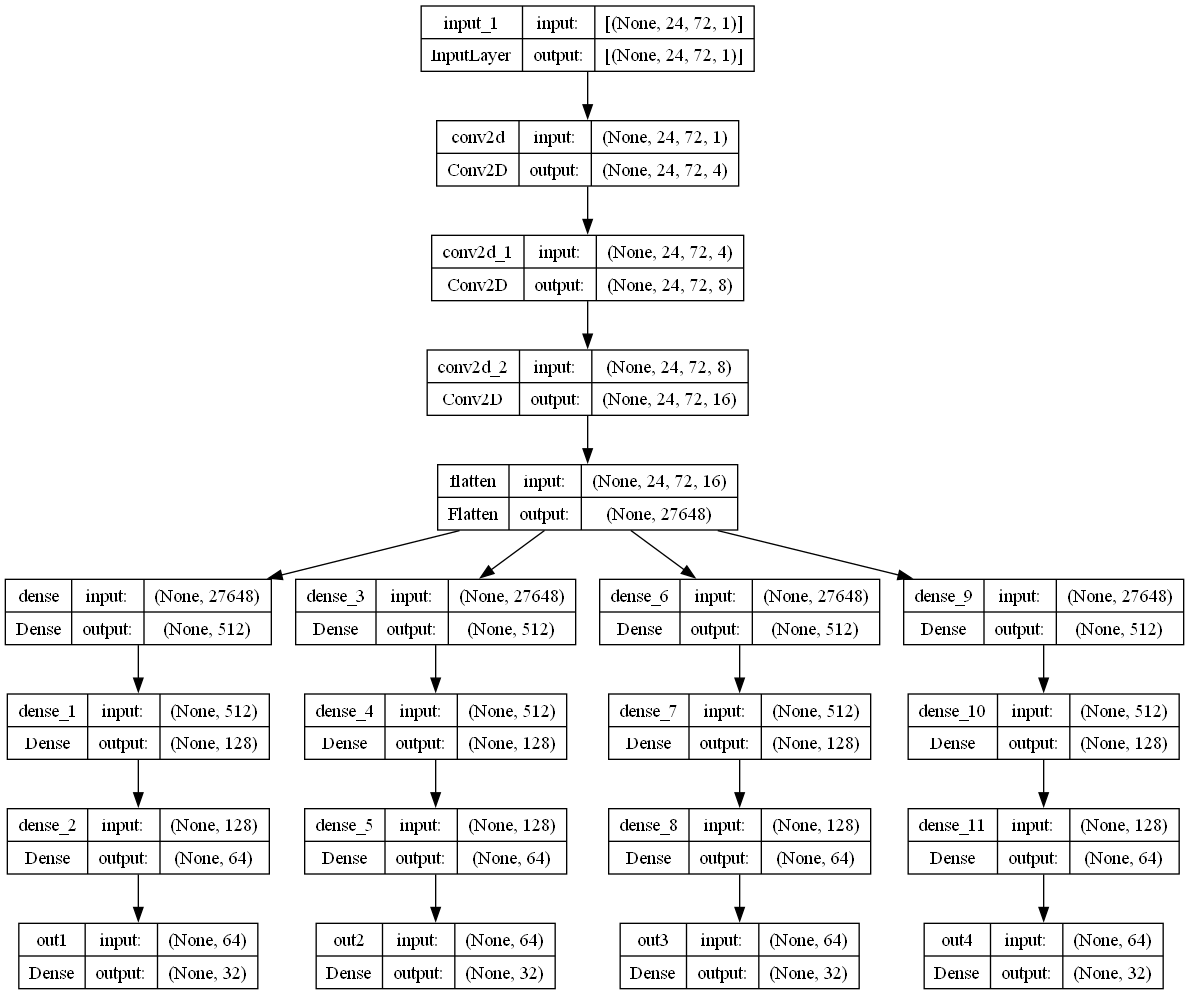

In [10]:
input = Input(shape=(24,72,1))

coe1 = (Conv2D(4,(3,3),padding='same'))(input)  # (3,3) عکس کوچیک
coe2 = (Conv2D(8,(3,3),padding='same'))(coe1)
coe3 = (Conv2D(16,(3,3),padding='same'))(coe2)


Flatten= Flatten()(coe3)

lay1_1 = (Dense(512,activation='relu'))(Flatten)
lay1_2 = (Dense(128,activation='relu'))(lay1_1)
lay1_3 = (Dense(64,activation='relu'))(lay1_2)
out1 = (Dense(32,activation='softmax',name='out1'))(lay1_3)

lay2_1 = (Dense(512,activation='relu'))(Flatten)
lay2_2 = (Dense(128,activation='relu'))(lay2_1)
lay2_3 = (Dense(64,activation='relu'))(lay2_2)
out2 = (Dense(32,activation='softmax',name='out2'))(lay2_3)

lay3_1 = (Dense(512,activation='relu'))(Flatten)
lay3_2 = (Dense(128,activation='relu'))(lay3_1)
lay3_3 = (Dense(64,activation='relu'))(lay3_2)
out3 = (Dense(32,activation='softmax',name='out3'))(lay3_3)

lay4_1 = (Dense(512,activation='relu'))(Flatten)
lay4_2 = (Dense(128,activation='relu'))(lay4_1)
lay4_3 = (Dense(64,activation='relu'))(lay4_2)
out4 = (Dense(32,activation='softmax',name='out4'))(lay4_3)


# merged = Concatenate(name='merged')([lay1_3,lay2_3,lay3_3,lay4_3])



M1 = Model(inputs=input, outputs=[out1,out2,out3,out4])

M1.compile('adam',loss='categorical_crossentropy')

plot_model(M1,show_shapes=True,show_layer_names=True)

In [11]:
H = M1.fit(x,[y_t[:,0],y_t[:,1],y_t[:,2],y_t[:,3]],epochs=10)

Epoch 1/10
308/308 [==============================] - 22s 61ms/step - loss: 7.8969 - out1_loss: 1.8999 - out2_loss: 2.0909 - out3_loss: 2.0004 - out4_loss: 1.9058
Epoch 2/10
308/308 [==============================] - 18s 60ms/step - loss: 1.5267 - out1_loss: 0.3575 - out2_loss: 0.4061 - out3_loss: 0.3918 - out4_loss: 0.3712
Epoch 3/10
308/308 [==============================] - 19s 61ms/step - loss: 0.6081 - out1_loss: 0.1390 - out2_loss: 0.1611 - out3_loss: 0.1481 - out4_loss: 0.1599
Epoch 4/10
308/308 [==============================] - 19s 62ms/step - loss: 0.4043 - out1_loss: 0.0997 - out2_loss: 0.0876 - out3_loss: 0.1118 - out4_loss: 0.1052
Epoch 5/10
308/308 [==============================] - 21s 67ms/step - loss: 0.3123 - out1_loss: 0.0677 - out2_loss: 0.0814 - out3_loss: 0.0759 - out4_loss: 0.0873
Epoch 6/10
308/308 [==============================] - 20s 66ms/step - loss: 0.2252 - out1_loss: 0.0479 - out2_loss: 0.0399 - out3_loss: 0.0808 - out4_loss: 0.0564
Epoch 7/10
308/308 [==

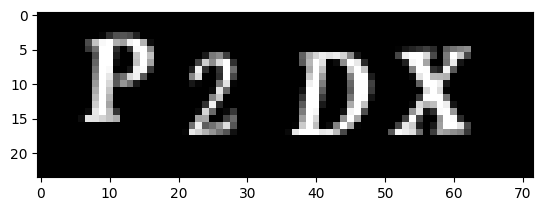

In [12]:
im = x_test[55]

plt.imshow(im,'gray');

In [13]:
p = M1.predict(im.reshape(1,24,72,1))
p

1/1 [==============================] - 0s 303ms/step


[array([[2.6551044e-15, 8.8597806e-19, 2.7415378e-24, 4.9849951e-21,
         1.0892799e-20, 5.6417077e-10, 1.7583733e-24, 5.7556887e-22,
         6.6724114e-15, 7.2473513e-06, 7.0060835e-15, 5.3900135e-06,
         1.7563694e-08, 5.9475190e-07, 2.7191311e-19, 2.1119699e-15,
         6.3603530e-15, 6.9051412e-18, 8.8778508e-18, 4.3399840e-22,
         5.5118894e-14, 9.9998629e-01, 2.9651442e-14, 1.9189826e-13,
         8.1368491e-22, 3.2716954e-11, 4.6953218e-13, 2.2198379e-21,
         5.9002732e-16, 1.3904085e-18, 4.3679977e-17, 4.8380844e-07]],
       dtype=float32),
 array([[9.78183568e-01, 5.40958411e-07, 1.54422910e-08, 6.70004441e-10,
         4.08269555e-12, 2.08393168e-02, 9.01974090e-06, 3.88407232e-12,
         9.15067989e-14, 8.91732327e-07, 6.62568833e-10, 5.35774358e-09,
         1.71602199e-08, 6.31582907e-06, 3.80377641e-13, 9.56865988e-13,
         6.69754445e-05, 6.51237744e-13, 3.73923649e-06, 9.48180909e-11,
         1.02372806e-16, 2.72453508e-06, 5.63997904e-14, 1

In [14]:
for i in p:
    # print(np.argmax(i))
    print(encoder.inverse_transform([np.argmax(i)]))

['P']
['2']
['D']
['X']


In [15]:
M1.save('model.h5')